In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=75
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.family':'sans-serif'})
plt.rcParams.update({'font.sans-serif':'Arial'})

In [22]:
fitDF = pd.read_csv('Fitting/mirnn/mirnn_fit.csv')
colors = list(mpl.colors.TABLEAU_COLORS)

In [24]:
compileDF = pd.read_csv('Data/arc_allcomm.csv')
compileDF.to_csv('Data/arc_commmono.csv', mode='w', index=False, header=True)

addDF = pd.read_csv('Data/arc_allmono.csv')
addDF.to_csv('Data/arc_commmono.csv', mode='a', index=False, header=False)

rawdataDF = pd.read_csv('Data/arc_commmono.csv')


In [28]:
AllSpecies = ['AC','BA','BC','BL','BT','BV','CC','DF','wt','delarc','parc-','parc+']
AllConditions = ['mono','comm11wtaTc','comm11delarcaTc','comm11parc','comm11parcaTc']
ConditionNames = ['Mono','Comm WT','Comm delarc','Comm parc-','Comm parc+']


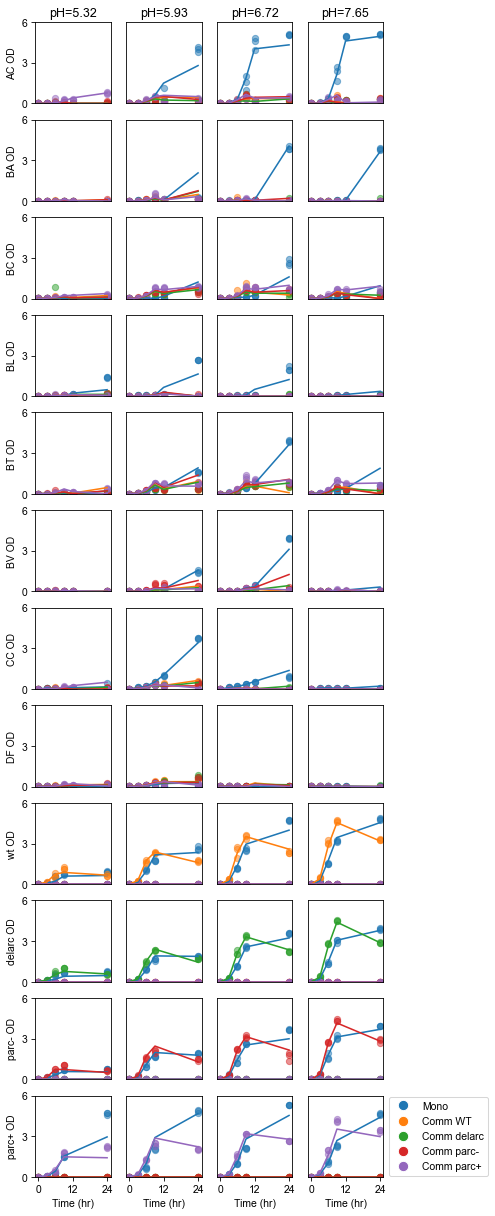

In [34]:
fig,ax = plt.subplots(len(AllSpecies),4, figsize=(6,20))
Exptime = [0,3,6,9,12,24]

AllExp = list(fitDF['Experiments'])
RawDataExp = list(rawdataDF['Experiments'])

for spnum,species in enumerate(AllSpecies):
    for pHnum,pH in enumerate([5,6,7,8]):
        for condnum,cond in enumerate(AllConditions):
            Exp = str(pH)+cond
            if cond == 'mono':
                Exp = species+'_pH'+str(pH)


            Expnum = AllExp.index(Exp)
            
            Exptime = [0,3,6,9,12,24]
            
            
            #true = list(fitDF[species+'_OD true'])[Expnum:Expnum+6]
            
            if species == 'wt' or species == 'delarc' or species == 'parc-' or species == 'parc+':
                Exptime = [0,3,6,9,24]
            
            pred = list(fitDF[species+'_OD pred'])[Expnum:Expnum+len(Exptime)]
            
            for rep in range(3):
                if cond == 'mono':
                    rawexpnum = RawDataExp.index(Exp+'_'+str(rep))
                else:
                    rawexpnum = RawDataExp.index(Exp+'_'+str(rep+1))
                true = list(rawdataDF[species+'_OD'])[rawexpnum:rawexpnum+len(Exptime)]
                ax[spnum][pHnum].scatter(Exptime,true,c=colors[condnum],alpha=0.5)
            ax[spnum][pHnum].plot(Exptime,pred,c=colors[condnum])
            
            
            
            ax[spnum][pHnum].set_ylim((0,6))
            ax[spnum][pHnum].set_yticks([])
            ax[spnum][pHnum].set_xticks([])
            
            

species_legend_elements =[
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[0],markerfacecolor=colors[0], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[1],markerfacecolor=colors[1], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[2],markerfacecolor=colors[2], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[3],markerfacecolor=colors[3], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[4],markerfacecolor=colors[4], markersize=10),
    
    ]

plt.legend(handles=species_legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

for spnum,species in enumerate(AllSpecies):
    ax[spnum][0].set_ylabel(species+' OD')
    ax[spnum][0].set_yticks([0,3,6])
    
for pHnum,pH in enumerate([5.32,5.93,6.72,7.65]):
    ax[0][pHnum].set_title('pH='+str(pH))
    ax[-1][pHnum].set_xticks([0,12,24])
    ax[-1][pHnum].set_xlabel('Time (hr)')
    
plt.savefig('Figures/mirnn/MiRNN_timeseries_fit.svg')

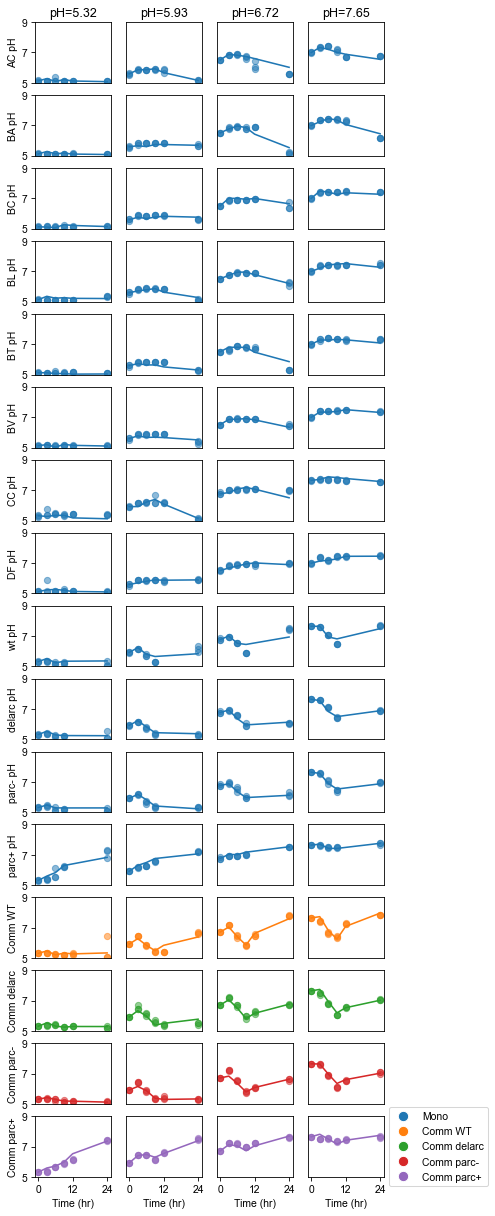

In [38]:
fig,ax = plt.subplots(len(AllSpecies)+4,4, figsize=(6,20))
Exptime = [0,3,6,9,12,24]

AllExp = list(fitDF['Experiments'])

for spnum,species in enumerate(AllSpecies):
    for pHnum,pH in enumerate([5,6,7,8]):
        cond == 'mono'
        Exp = species+'_pH'+str(pH)
        
        Expnum = AllExp.index(Exp)
        Exptime = [0,3,6,9,12,24]

        
        if species == 'wt' or species == 'delarc' or species == 'parc-' or species == 'parc+':           
            Exptime = [0,3,6,9,24]
        
        pred = list(fitDF['pH pred'])[Expnum:Expnum+len(Exptime)]

        for rep in range(3):  
            rawexpnum = RawDataExp.index(Exp+'_'+str(rep))
            true = list(rawdataDF['pH'])[rawexpnum:rawexpnum+len(Exptime)]
            ax[spnum][pHnum].scatter(Exptime,true,c=colors[0],alpha=0.5)
        ax[spnum][pHnum].plot(Exptime,pred,c=colors[0])

        ax[spnum][pHnum].set_ylim((5,9))
        ax[spnum][pHnum].set_yticks([])
        ax[spnum][pHnum].set_xticks([])
        


for condnum,cond in enumerate(AllConditions):
    for pHnum,pH in enumerate([5,6,7,8]):
        Exp = str(pH)+cond
        if cond == 'mono' or cond == 'comm':
            continue

        Expnum = AllExp.index(Exp)
        Exptime = [0,3,6,9,12,24]



        pred = list(fitDF['pH pred'])[Expnum:Expnum+len(Exptime)]
        
        for rep in range(3):  
            rawexpnum = RawDataExp.index(Exp+'_'+str(rep+1))
            true = list(rawdataDF['pH'])[rawexpnum:rawexpnum+len(Exptime)]
            ax[condnum+len(AllSpecies)-1][pHnum].scatter(Exptime,true,c=colors[condnum],alpha=0.5)
        ax[condnum+len(AllSpecies)-1][pHnum].plot(Exptime,pred,c=colors[condnum])

        ax[condnum+len(AllSpecies)-1][pHnum].set_ylim((5,9))
        ax[condnum+len(AllSpecies)-1][pHnum].set_yticks([])
        ax[condnum+len(AllSpecies)-1][pHnum].set_xticks([])
            
            

species_legend_elements =[
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[0],markerfacecolor=colors[0], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[1],markerfacecolor=colors[1], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[2],markerfacecolor=colors[2], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[3],markerfacecolor=colors[3], markersize=10),
    Line2D([0], [0], marker='o', color='w', label=ConditionNames[4],markerfacecolor=colors[4], markersize=10),
    #Line2D([0], [0], marker='o', color='w', label=ConditionNames[5],markerfacecolor=colors[5], markersize=10),
    
    ]

plt.legend(handles=species_legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

for spnum,species in enumerate(AllSpecies):
    ax[spnum][0].set_ylabel(species+' pH')
    ax[spnum][0].set_yticks([5,7,9])

for condnum,cond in enumerate(AllConditions):
    
    if cond == 'mono' or cond == 'comm':
        continue
    ax[condnum+len(AllSpecies)-1][0].set_ylabel(ConditionNames[condnum])
    ax[condnum+len(AllSpecies)-1][0].set_yticks([5,7,9])
    
for pHnum,pH in enumerate([5.32,5.93,6.72,7.65]):
    ax[0][pHnum].set_title('pH='+str(pH))
    ax[-1][pHnum].set_xticks([0,12,24])
    ax[-1][pHnum].set_xlabel('Time (hr)')
    
plt.savefig('Figures/mirnn/MiRNN_timeseries_fit_pH.svg')

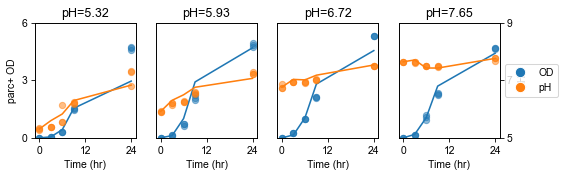

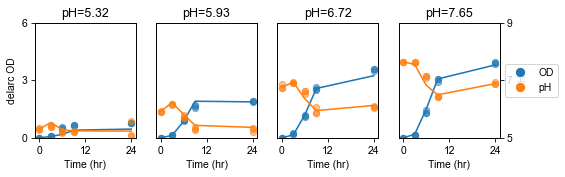

In [46]:
#plot monoculture fit of delarc and parc+

species_pH_legend_elements =[
    Line2D([0], [0], marker='o', color='w', label='OD',markerfacecolor='tab:blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='pH',markerfacecolor='tab:orange', markersize=10),
    
    ]

AllSpecies = ['parc+','delarc']

for spnum,species in enumerate(AllSpecies):
    fig,ax = plt.subplots(1,4, figsize=(8,2))
    for pHnum,pH in enumerate([5,6,7,8]):
        cond == 'mono'
        Exp = species+'_pH'+str(pH)
        
        Expnum = AllExp.index(Exp)
            
        Exptime = [0,3,6,9,24]

        pred = list(fitDF[species+'_OD pred'])[Expnum:Expnum+len(Exptime)]

        for rep in range(3):
            rawexpnum = RawDataExp.index(Exp+'_'+str(rep))
            true = list(rawdataDF[species+'_OD'])[rawexpnum:rawexpnum+len(Exptime)]
            ax[pHnum].scatter(Exptime,true,c='tab:blue',alpha=0.5)
        ax[pHnum].plot(Exptime,pred,c='tab:blue')

        ax[pHnum].set_ylim((0,6))
        ax[pHnum].set_yticks([])
        ax[pHnum].set_xticks([])
        
        
        pred = list(fitDF['pH pred'])[Expnum:Expnum+len(Exptime)]
        ax2 = ax[pHnum].twinx()

        for rep in range(3):  
            rawexpnum = RawDataExp.index(Exp+'_'+str(rep))
            true = list(rawdataDF['pH'])[rawexpnum:rawexpnum+len(Exptime)]
            ax2.scatter(Exptime,true,c='tab:orange',alpha=0.5)
        ax2.plot(Exptime,pred,c='tab:orange')

        ax2.set_ylim((5,9))
        ax2.set_yticks([])
        ax2.set_xticks([])
        
        
    plt.legend(handles=species_pH_legend_elements,loc='center left', bbox_to_anchor=(1, 0.5))

    ax[0].set_ylabel(species+' OD')
    ax[0].set_yticks([0,3,6])

    ax2.set_ylabel('pH')
    ax2.set_yticks([5,7,9])

    for pHnum,pH in enumerate([5.32,5.93,6.72,7.65]):
        ax[pHnum].set_title('pH='+str(pH))
        ax[pHnum].set_xticks([0,12,24])
        ax[pHnum].set_xlabel('Time (hr)')
        
    plt.savefig('Figures/mirnn/'+species+'_fit_ODpH.svg')
    
        